# Algorithms Project: The Big Heist
by Pavel Borovikov

> #### Objective:
> Using the provided data from *bank_data.csv*, **aquire as much money as possible** from the banks in **under 24 hours**. The banks are spread on an area of $100km^{2}$ and their time to rob and money is available in the provided data. The hypothetical car that will be used during the heist travels at a speed of 30*km/h*. The car can start at any bank, but must end it's travels at the point of origin (0,0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/bank_data.csv')
df.describe()

,id,x_coordinate,y_coordinate,money,time (hr)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,-0.016431,0.037561,18430.320000,0.750245
std,2886.89568,2.889568,2.881789,25382.131155,0.433541
min,0.00000,-4.999292,-4.999928,100.000000,0.000032
25%,2499.75000,-2.513854,-2.415033,900.000000,0.373141
50%,4999.50000,-0.024904,0.010442,5800.000000,0.749218
75%,7499.25000,2.461754,2.540303,26900.000000,1.122812
max,9999.00000,4.999851,4.999626,102300.000000,1.499851


The data provided contains a unique id for each of the 10 000 banks, which will later be used to create a route.

<br>

### Columns :

    id : unique intiger id for the bank
    x_coordinate, y_coordinate : x and y coordinates of the bank
    money : total gains from the bank
    time (hr) : total time necessary to rob the bank
<br>

Some important things to notice in the description above are the differences between the minimum amounts of money and time compared to their respective maximum.

<br>

Due to these differences, 

<br>

> **To get a better understanding of the data, the following columns will be added:**<br><br>
> > **money per hour** : standardized amount of gains per 1h to rob the bank.<br><br>
> > **day percent** : the percentage of the total 24h that it would take to rob the bank.<br><br>
> > **score** : the score dividing the money gained per hour by the percentage of the day that it will take.

In [3]:
df['money per hour'] = df['money'] / df['time (hr)']
df['day percent'] = (df['time (hr)'] / 24) * 100
df['score'] = df['money per hour'] / df['day percent']
print("Minimum score : ", df['score'].min())
print("Maximum score : ", df['score'].max())

Minimum score :  10.672129720175688
Maximum score :  378643003805.95105


Due to the big difference in score, a logarithm is applied to achieve a smaller range.

In [4]:
df['score'] = np.log(df['score'])
print("Minimum score : ", df['score'].min())
print("Maximum score : ", df['score'].max())

Minimum score :  2.3676356442882707
Maximum score :  26.659859655657748


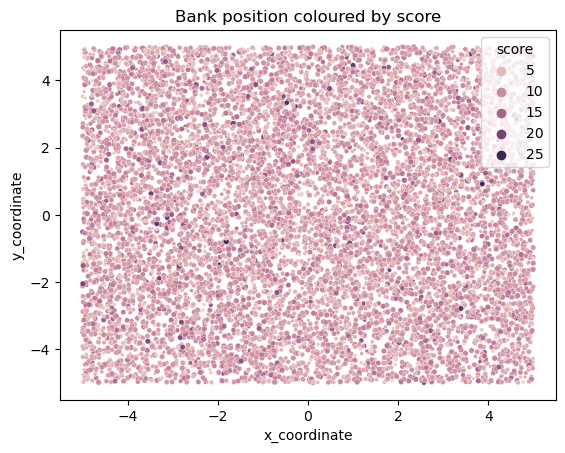

In [28]:
sns.scatterplot(x=df['x_coordinate'], y=df['y_coordinate'], hue=df['score'], s=np.log2(df['money']));
plt.title('Bank position coloured by score');

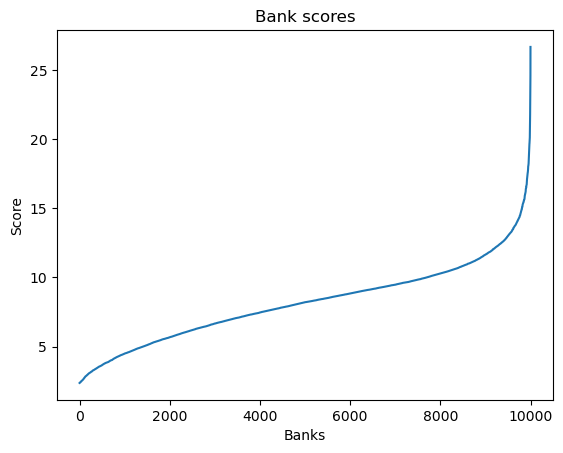

In [5]:
sorted_scores = df['score'].sort_values()
x = np.arange(len(df['score']))

plt.plot(x, sorted_scores)
plt.title('Bank scores')
plt.xlabel('Banks')
plt.ylabel('Score')
plt.show()

According to the graph above, a small amount of banks have a significantly higher score than others.

Total money: 7206800
Time to rob:  4.293906774607613
Total amount banks:  189


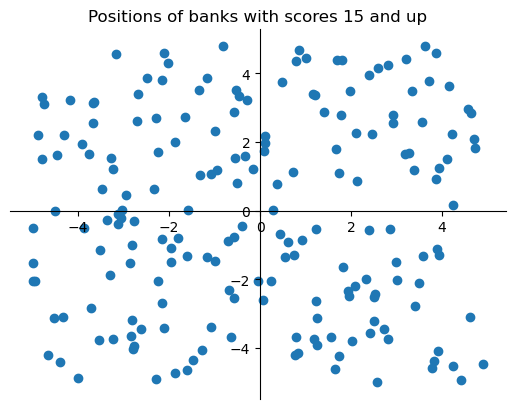

In [17]:
best = df.loc[(df['score'] >= 15)]

fig, ax = plt.subplots()
ax.set_title('Positions of banks with scores 15 and up')

ax.scatter(best['x_coordinate'], best['y_coordinate'], label='15 and up')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Total money:', best['money'].sum())
print('Time to rob: ', best['time (hr)'].sum())
print('Total amount banks: ', len(best))
plt.show()

The first approach to this problem will be applying a nearest neighbour algorithm of best case complexity $O(n^{2})$